## Python - Pandas Basic Usage

#### This notebook uses Iris dataset to run through common Pandas function:
##### Data Loading:
    
    Loading a csv file
    Loading a text file
    Loading an Excel file
    Loading directly from Kaggle
    Loading directly from GitHub
    Loading directly from Web
    Loading a csv file with different delimeter
    Defining custom column names
    Defining index ID
    Skipping top n rows
    Skipping bottom n rows
        
##### Filtering:

    Fundamentals of Filtering
    Based on a single column
    Based on multiple columns
    Using iloc function
    Based on a list
    Based on a tuple (group of values)
    null value in a column
    null value in a row
    null value in a set of columns    


___________________________________________________________________________________________________________________
___________________________________________________________________________________________________________________


#### Import pandas

In [2]:
import pandas as pd

## Data Loading

#### Importing Kaggle to Download Data

In [2]:
## if kaggle isn't already installed
# pip install kaggle 

In [3]:
## To download data directly from Kaggle into path folder

# import kaggle
# kaggle.api.dataset_download_files('uciml/iris', path='./data', unzip=True)

#### Loading From a CSV File

In [3]:
## Loading Data into a dataframe

iris = pd.read_csv("data/iris.csv", index_col='Id')
iris.head(2)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa


#### Loading From a TXT File

In [ ]:

iris = pd.read_csv("data/iris.txt",index_col='Id')
iris.head(2)

#### Loading From an Excel File

#### Loading directly from GitHub or Web

####    Loading a csv file with different delimeter

#### Defining custom column names

#### Defining index ID

#### Skipping top n rows

#### Skipping bottom n rows

____________________________________________________________________________________________________________________________

____________________________________________________________________________________________________________________________


## Data Filtering

#### Basics of filtering

In [5]:
## filtering criteria results in a list/array of true/false boolean values. 
## Passing it into a dataframe filters for rows that are true

iris['Species'] == 'Iris-virginica'

Id
1      False
2      False
3      False
4      False
5      False
       ...  
146     True
147     True
148     True
149     True
150     True
Name: Species, Length: 150, dtype: bool

#### Filtering using a single column/condition

In [6]:
## Basic filtering directly using the column
iris[iris.Species == 'Iris-virginica'].head(2)  

## If column name has spaces, alternate method is:
# iris[iris['Species'] == 'Iris-virginica']

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
101,6.3,3.3,6.0,2.5,Iris-virginica
102,5.8,2.7,5.1,1.9,Iris-virginica


#### Filtering using multiple columns/conditions

In [7]:
## Use brackets for combining conditions - example either Widtha > 3 or Length > 5
iris[(iris['Species'] == 'Iris-virginica') & ( (iris['SepalWidthCm'] > 3) | (iris['SepalLengthCm'] > 5) )  ].head(2)

## Not using brackets will treat each condition separately - example Length > 5 will be fetched irrespective of species or Width
# iris[(iris['Species'] == 'Iris-virginica') & ( (iris['SepalWidthCm'] > 3) | (iris['SepalLengthCm'] > 5) )  ].head(2)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
101,6.3,3.3,6.0,2.5,Iris-virginica
102,5.8,2.7,5.1,1.9,Iris-virginica


#### Filtering using iloc

In [8]:
## Filter using iloc

#iris.iloc[0:5,3:5] ## note - for ranges, the to index is excluded

#iris.iloc[:,0:5] ## - All rows, column range

#iris.iloc[[1,2,5],[1,3,4]] ## - Specified Rows and specified columns

#iris.iloc[0] ## - Specific row

iris.iloc[:,0] >= 5

Id
1       True
2      False
3      False
4      False
5       True
       ...  
146     True
147     True
148     True
149     True
150     True
Name: SepalLengthCm, Length: 150, dtype: bool

#### Filtering using a list

In [9]:
## Use the .isin() function to filter for a list of values
iris[iris.Species.isin(['Iris-virginica','Iris-setosa'])]

## Use a simialr approach to filter for multiple conditions
#iris[ (iris.Species.isin(['Iris-virginica','Iris-setosa'])) & (iris['SepalWidthCm'] > 4) ]


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,Iris-virginica
147,6.3,2.5,5.0,1.9,Iris-virginica
148,6.5,3.0,5.2,2.0,Iris-virginica


#### Filter using a tuple

https://stackoverflow.com/questions/48228060/filter-pandas-dataframe-from-tuples

In [10]:
## We can combmine the columns together to create a tuple first

iris[['PetalLengthCm','Species']].apply(tuple,1)

Id
1         (1.4, Iris-setosa)
2         (1.4, Iris-setosa)
3         (1.3, Iris-setosa)
4         (1.5, Iris-setosa)
5         (1.4, Iris-setosa)
               ...          
146    (5.2, Iris-virginica)
147    (5.0, Iris-virginica)
148    (5.2, Iris-virginica)
149    (5.4, Iris-virginica)
150    (5.1, Iris-virginica)
Length: 150, dtype: object

In [11]:
## Utilize this tuple and .isin() function

iris[iris[['PetalLengthCm','Species']].apply(tuple,1).isin([(1.5,'Iris-setosa')])]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
4,4.6,3.1,1.5,0.2,Iris-setosa
8,5.0,3.4,1.5,0.2,Iris-setosa
10,4.9,3.1,1.5,0.1,Iris-setosa
11,5.4,3.7,1.5,0.2,Iris-setosa
16,5.7,4.4,1.5,0.4,Iris-setosa
20,5.1,3.8,1.5,0.3,Iris-setosa
22,5.1,3.7,1.5,0.4,Iris-setosa
28,5.2,3.5,1.5,0.2,Iris-setosa
32,5.4,3.4,1.5,0.4,Iris-setosa


#### Filter for null in a specific column - Try removing random values in the raw data.
#### Key note - isna and isnull are the same function. 
Literally in the code: https://github.com/pandas-dev/pandas/blob/0409521665bd436a10aea7e06336066bf07ff057/pandas/core/dtypes/missing.py#L109

In [12]:
## using isnull, isna, or notnull functions

# iris[iris.Species.isnull()]

iris[iris.Species.isna()]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,


#### Filter for null in any column / row

In [26]:
## isna checks each value if it in na or not
## any checks if any value in the "series" is na or not. Axis determines what is considered 1 = row ; 0 = column

iris.isna().any(axis = 0)
#iris.isna().any(axis = 1)

SepalLengthCm    False
SepalWidthCm     False
PetalLengthCm     True
PetalWidthCm     False
Species          False
dtype: bool

In [27]:
## Filter dataframe for any row that has na/null in it
iris[iris.isna().any(axis = 1)]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,NaN,0.2,Iris-setosa


In [30]:
iris[iris[['PetalLengthCm','Species']].isna().any(axis = 1)]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,NaN,0.2,Iris-setosa


____________________________________________________________________________________________________________________________

____________________________________________________________________________________________________________________________


## Correction:

#### Replace null with a value

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html

In [39]:
## use fillna to replace na/NaN with specified value. Can replace 0 with a different value
## Other parameters are: inplace = true/false (controls if the df itself is overwritten or a new one is returned
## axis = 0/1 controls if operation occurs row by row or col by col. 1 = row-wise, 0 = col-wise

iris['Species'] = iris['Species'].fillna(0)
#iris['Species'].fillna('Replaced', inplace = True, axis= 0)

#### Replace set of columns with missing values

In [51]:
iris[['Species','PetalWidthCm']] = iris[['Species','PetalWidthCm']].fillna(0)

#### Replace with column max or min

In [52]:
iris[['Species','PetalWidthCm']] = iris[['Species','PetalWidthCm']].fillna(iris[['Species','PetalWidthCm']].max())

#### Notes:
#### 1. You can pass a dictionary with column name and replacing value (if each column should be replaced by a different value)
#### 2. You can pass a series and each na value is replaced by the corresponding index in the series. Example below:

In [66]:
## Using a series

df = pd.DataFrame({'A': [1, None, None, 2]})
values = [10, 20]  # List of replacement values

# Replace NaN with sequential values from the list
df['A'] = df['A'].fillna(pd.Series(values))

df

,A
0,1.0
1,20.0
2,NaN
3,2.0


### Additional reading: 
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.ne.html

#### Convert string column to lower case or upper case

In [77]:
## Use str functions for any data corrections

iris['Species'] = iris['Species'].str.lower() 
iris['Species']

# iris['Species'] = iris['Species'].str.upper() 
# iris['Species']

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Species Type,Species Name
Id,,,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa,Iris,setosa
2,4.9,3.0,1.4,0.2,Iris-setosa,Iris,setosa
3,4.7,3.2,1.3,0.2,Iris-setosa,Iris,setosa
4,4.6,3.1,1.5,0.2,Iris-setosa,Iris,setosa
5,5.0,3.6,1.4,0.2,Iris-setosa,Iris,setosa
...,...,...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,Iris-virginica,Iris,virginica
147,6.3,2.5,5.0,1.9,Iris-virginica,Iris,virginica
148,6.5,3.0,5.2,2.0,Iris-virginica,Iris,virginica


In [79]:
## Split a column into multiple columns

iris[['Species Type','Species Name']] = iris['Species'].str.split("-", n = 1, expand= True)
iris

## expand splits the tuple into different columns. Alternatively: df['a'] , df['b'] = df['ab'].str.split("-").str

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Species Type,Species Name
Id,,,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa,Iris,setosa
2,4.9,3.0,1.4,0.2,Iris-setosa,Iris,setosa
3,4.7,3.2,1.3,0.2,Iris-setosa,Iris,setosa
4,4.6,3.1,1.5,0.2,Iris-setosa,Iris,setosa
5,5.0,3.6,1.4,0.2,Iris-setosa,Iris,setosa
...,...,...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,Iris-virginica,Iris,virginica
147,6.3,2.5,5.0,1.9,Iris-virginica,Iris,virginica
148,6.5,3.0,5.2,2.0,Iris-virginica,Iris,virginica


### Tip: str, dt are called "Accessors" - they allow for specialized operations on data in a series or index

____________________________________________________________________________________________________________________________

____________________________________________________________________________________________________________________________


## Data Types

#### Change Data Type of a Column
#### Reassignment is skipped here - do not forget to reassign column once changed. df['a'] = df['a'].astype(int)

In [81]:
## Check column data type
iris.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
Species Type      object
Species Name      object
dtype: object

In [90]:
iris.PetalWidthCm.astype(int)

#iris.PetalWidthCm.astype('float32')

Id
1      0
2      0
3      0
4      0
5      0
      ..
146    2
147    1
148    2
149    2
150    1
Name: PetalWidthCm, Length: 150, dtype: int32

In [93]:
## Converts to numeric and bypasses errors with nan

pd.to_numeric(iris.PetalWidthCm, errors='coerce')

### For datetime - pd.to_datetime(df['datetime_column'])

Id
1      0.2
2      0.2
3      0.2
4      0.2
5      0.2
      ... 
146    2.3
147    1.9
148    2.0
149    2.3
150    1.8
Name: PetalWidthCm, Length: 150, dtype: float64

#### Assign datatype during data load

In [169]:
dtype_dic = {'SepalLengthCm' : float, 'SepalWidthCm' : float, 'PetalLengthCm' : float, 'PetalWidthCm' : float, 'Species' : str}
iris_int_dt = pd.read_csv("data/iris.csv", dtype=dtype_dic)

## Notes - dtype can not convert float to int. Needs to happen afterwards using astype(int)
## Converters can be used example: 

#iris_int_dt = pd.read_csv("data/iris.csv",converters={'SepalLengthCm': lambda x: int(float(x))} )

## Converters can be used for other converstion:
    ## Removing $ from numeric column - converters={'score': lambda x: 0 if x == 'N/A' else int(x)}
    ## Changing column to datetime while loading - converters={'date_column': pd.to_datetime}
    ## Replacing N/A with 0/other values - converters={'price': lambda x: ''.join(filter(str.isdigit, x))}
    
iris_int_dt

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


____________________________________________________________________________________________________________________________

____________________________________________________________________________________________________________________________


## Aggregations

#### Group By Function

    .agg({'col1': ['sum', 'mean'], 'col2': ['max', 'min']})   Multiple functions per column
    
    columns = ['new_name1', 'new_name2']	                  Rename aggregated columns (as a new line, after agg is done)
    
    .agg(NewName=('col', 'func'))	                         Named aggregation (cleaner)
    
    groupby(as_index = False)                                 Grouped columns as treated as columns rather than index


In [24]:
## Syntax is df.groupby(<column_list>).agg[<dict-attribte:agg_type>]

iris_grouped = iris.groupby('Species')['SepalLengthCm'].mean()
iris_grouped

## Example with multiple grouping columns and variety of aggregations
iris_duplicate = iris
iris_duplicate['Species_duplicate'] = "Dummy Column" ## Creating additional column

#iris_dup_grouped = iris_duplicate.groupby(['Species','Species_duplicate'], as_index = False).agg(
#    {'SepalLengthCm' : 'mean', 
#     'SepalWidthCm' : 'sum'})

## Much cleaner version with named aggregations is:

iris_dup_grouped = iris_duplicate.groupby(['Species','Species_duplicate'], as_index = False).agg(
    SepalLengthAvg = ('SepalLengthCm','mean'),
    SepalWidthSum  = ('SepalWidthCm' ,'sum' ),
    SepalWidthMax  = ('SepalWidthCm' ,'max' ))


## For quick multiple

iris_dup_grouped = pd.DataFrame(iris_dup_grouped)
iris_dup_grouped


,Species,Species_duplicate,SepalLengthAvg,SepalWidthSum,SepalWidthMax
0,Iris-setosa,Dummy Column,5.006,170.9,4.4
1,Iris-versicolor,Dummy Column,5.936,138.5,3.4
2,Iris-virginica,Dummy Column,6.588,148.7,3.8


____________________________________________________________________________________________________________________________

____________________________________________________________________________________________________________________________


## Transformations

#### Group By Function
    Pivot
    Unpivot
    Transpose
    One-Hot Encoding
    Z-Scaling
    Min-Max Scalar
    Merge
    Append

#### Pivot

##### Pivot function is used when values are unique
##### Pivot_table function is used when values need to be aggregated (e.g. sum, mean, max)

In [260]:
## Non-iris data to better understand pivoting:

df = pd.DataFrame({
    'Date': ['2023-01-01', '2023-01-01', '2023-01-02', '2023-01-02'],
    'Store': ['X', 'Y', 'X', 'Y'],
    'Category': ['A', 'B', 'A', 'B'],
    'Sales': [100, 200, 150, 250],
    'Margin': [100, 200, 150, 250]
})

df

,Date,Store,Category,Sales,Margin
0,2023-01-01,X,A,100,100
1,2023-01-01,Y,B,200,200
2,2023-01-02,X,A,150,150
3,2023-01-02,Y,B,250,250


In [263]:
## Using Pivot - If there were duplicates, it would throw an error.

df_pivot = df.pivot(index=['Date', 'Store'], columns='Category', values= ['Sales','Margin'])
df_pivot

Sales        Margin       
Category              A      B      A      B
Date       Store                            
2023-01-01 X      100.0    NaN  100.0    NaN
           Y        NaN  200.0    NaN  200.0
2023-01-02 X      150.0    NaN  150.0    NaN
           Y        NaN  250.0    NaN  250.0

In [275]:
## Pivot table allows for multiple aggregations

df_pivot_table = df.pivot_table(index=['Date', 'Store'], columns='Category', values=['Sales','Margin'], aggfunc= {'Sales':['sum','min'] , 'Margin' : 'max'})
df_pivot_table

## If multiple aggregations are to be passed for all columns

#df_pivot_table = df.pivot_table(index=['Date', 'Store'], columns='Category', values=['Sales','Margin'], aggfunc= ['sum','mean'])
#df_pivot_table

Margin         Sales                     
                    max           min           sum       
Category              A      B      A      B      A      B
Date       Store                                          
2023-01-01 X      100.0    NaN  100.0    NaN  100.0    NaN
           Y        NaN  200.0    NaN  200.0    NaN  200.0
2023-01-02 X      150.0    NaN  150.0    NaN  150.0    NaN
           Y        NaN  250.0    NaN  250.0    NaN  250.0

In [276]:
## To flatten multi-index

# Column name fix
df_pivot_table.columns = ['_'.join(col) for col in df_pivot_table.columns]

# Index reset
df_pivot_table = df_pivot_table.reset_index()

df_pivot_table


,Date,Store,Margin_max_A,Margin_max_B,Sales_min_A,Sales_min_B,Sales_sum_A,Sales_sum_B
0,2023-01-01,X,100.0,NaN,100.0,NaN,100.0,NaN
1,2023-01-01,Y,NaN,200.0,NaN,200.0,NaN,200.0
2,2023-01-02,X,150.0,NaN,150.0,NaN,150.0,NaN
3,2023-01-02,Y,NaN,250.0,NaN,250.0,NaN,250.0


In [283]:
df_unpivot = df_pivot_table.melt(id_vars=['Date','Store'], var_name= 'Category', value_name='Metric')
df_unpivot

,Date,Store,Category,Metric
0,2023-01-01,X,Margin_max_A,100.0
1,2023-01-01,Y,Margin_max_A,NaN
2,2023-01-02,X,Margin_max_A,150.0
3,2023-01-02,Y,Margin_max_A,NaN
4,2023-01-01,X,Margin_max_B,NaN
5,2023-01-01,Y,Margin_max_B,200.0
6,2023-01-02,X,Margin_max_B,NaN
7,2023-01-02,Y,Margin_max_B,250.0
8,2023-01-01,X,Sales_min_A,100.0
9,2023-01-01,Y,Sales_min_A,NaN


In [284]:
df_unpivot[['Metric_Type','Agg','Store_Category']] = df_unpivot['Category'].str.split('_',expand=True)
df_unpivot

,Date,Store,Category,Metric,Metric_Type,Agg,Store_Category
0,2023-01-01,X,Margin_max_A,100.0,Margin,max,A
1,2023-01-01,Y,Margin_max_A,NaN,Margin,max,A
2,2023-01-02,X,Margin_max_A,150.0,Margin,max,A
3,2023-01-02,Y,Margin_max_A,NaN,Margin,max,A
4,2023-01-01,X,Margin_max_B,NaN,Margin,max,B
5,2023-01-01,Y,Margin_max_B,200.0,Margin,max,B
6,2023-01-02,X,Margin_max_B,NaN,Margin,max,B
7,2023-01-02,Y,Margin_max_B,250.0,Margin,max,B
8,2023-01-01,X,Sales_min_A,100.0,Sales,min,A
9,2023-01-01,Y,Sales_min_A,NaN,Sales,min,A


### Merging

In [288]:
# Creating an aggregated iris dataset to join back on the iris dataset.
# Goal - to create a full iris dataset with extra columns for average by group columns for petal width and length

iris_group = iris.groupby('Species', as_index= False).agg(
    SepalLengthAvg = ('SepalLengthCm','mean') , SepalWidthAvg = ('SepalWidthCm','mean'))

iris_group

,Species,SepalLengthAvg,SepalWidthAvg
0,Iris-setosa,5.004082,3.418
1,Iris-versicolor,5.936000,2.770
2,Iris-virginica,6.588000,2.974


In [291]:
# Syntax pd.merge(df1, df2, left_on = <columns>, right_on = <columns> , how = 'left')

# how = left right outer inner

# to rename : .rename(columns={'OldName': 'NewName'})

# to drop column : .drop(columns=['B'])

iris_merged = pd.merge(iris, iris_group, left_on = ['Species'], right_on= ['Species'], how = 'left').drop(columns='Species_duplicate')

iris_merged

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,SepalLengthAvg,SepalWidthAvg
0,NaN,3.5,100.0,0.2,Iris-setosa,5.004082,3.418
1,4.9,3.0,1.4,0.2,Iris-setosa,5.004082,3.418
2,4.7,3.2,1.3,0.2,Iris-setosa,5.004082,3.418
3,4.6,3.1,1.5,0.2,Iris-setosa,5.004082,3.418
4,5.0,3.6,1.4,-1.2,Iris-setosa,5.004082,3.418
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,6.588000,2.974
146,6.3,2.5,5.0,1.9,Iris-virginica,6.588000,2.974
147,6.5,3.0,5.2,2.0,Iris-virginica,6.588000,2.974
148,6.2,3.4,5.4,2.3,Iris-virginica,6.588000,2.974


### Append / Concat

In [297]:
# Syntax : pd.concat([df1, df2])
# New columns and NaN is generated for mismatches between columns
iris_concatenated = pd.concat([iris, iris_group])
iris_concatenated

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Species_duplicate,SepalLengthAvg,SepalWidthAvg
1,NaN,3.5,100.0,0.2,Iris-setosa,Dummy Column,NaN,NaN
2,4.9,3.0,1.4,0.2,Iris-setosa,Dummy Column,NaN,NaN
3,4.7,3.2,1.3,0.2,Iris-setosa,Dummy Column,NaN,NaN
4,4.6,3.1,1.5,0.2,Iris-setosa,Dummy Column,NaN,NaN
5,5.0,3.6,1.4,-1.2,Iris-setosa,Dummy Column,NaN,NaN
...,...,...,...,...,...,...,...,...
149,6.2,3.4,5.4,2.3,Iris-virginica,Dummy Column,NaN,NaN
150,5.9,3.0,5.1,1.8,Iris-virginica,Dummy Column,NaN,NaN
0,NaN,NaN,NaN,NaN,Iris-setosa,NaN,5.004082,3.418
1,NaN,NaN,NaN,NaN,Iris-versicolor,NaN,5.936000,2.770


____________________________________________________________________________________________________________________________

____________________________________________________________________________________________________________________________


## Summaries

In [302]:
# Count will be lower than total rows in there are NaN
iris.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,149.000000,150.000000,150.000000,150.000000
mean,5.848322,3.054000,4.416000,1.189333
std,0.828594,0.433594,8.050129,0.783740
min,4.300000,2.000000,1.000000,-1.200000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,100.000000,2.500000


In [306]:
# include = 'all' for both numerical and categorical data
iris.describe(include='all')

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Species_duplicate
count,149.000000,150.000000,150.000000,150.000000,150,150
unique,NaN,NaN,NaN,NaN,3,1
top,NaN,NaN,NaN,NaN,Iris-virginica,Dummy Column
freq,NaN,NaN,NaN,NaN,50,150
mean,5.848322,3.054000,4.416000,1.189333,NaN,NaN
std,0.828594,0.433594,8.050129,0.783740,NaN,NaN
min,4.300000,2.000000,1.000000,-1.200000,NaN,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN,NaN
50%,5.800000,3.000000,4.400000,1.300000,NaN,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN,NaN


In [308]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   SepalLengthCm      149 non-null    float64
 1   SepalWidthCm       150 non-null    float64
 2   PetalLengthCm      150 non-null    float64
 3   PetalWidthCm       150 non-null    float64
 4   Species            150 non-null    object 
 5   Species_duplicate  150 non-null    object 
dtypes: float64(4), object(2)
memory usage: 13.2+ KB


In [315]:
iris.nunique()

SepalLengthCm        35
SepalWidthCm         23
PetalLengthCm        44
PetalWidthCm         23
Species               3
Species_duplicate     1
dtype: int64

In [313]:
# Check for duplicate rows
print(iris.duplicated().sum())

3


In [320]:
print("Skewness")
print(iris.skew())
print("Kurtosis")
print(iris.kurt())

Skewness
SepalLengthCm     0.303098
SepalWidthCm      0.334053
PetalLengthCm    11.371489
PetalWidthCm     -0.241659
dtype: float64
Kurtosis
SepalLengthCm     -0.553560
SepalWidthCm       0.290781
PetalLengthCm    135.822998
PetalWidthCm      -0.931658
dtype: float64


<AxesSubplot:>

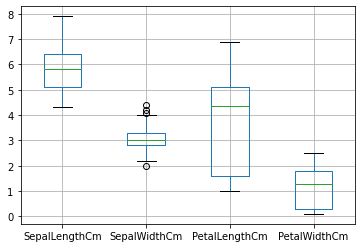

In [323]:
iris.boxplot()

<AxesSubplot:ylabel='Density'>

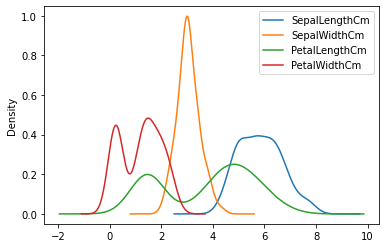

In [324]:
iris.plot(kind= 'density')

____________________________________________________________________________________________________________________________

____________________________________________________________________________________________________________________________


## Visualizations

In [5]:
# Importing matplotlib
import matplotlib.pyplot as plt

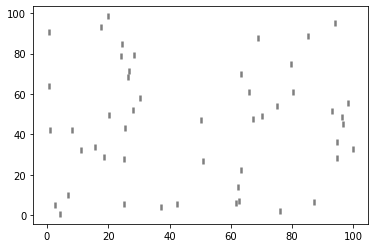

In [17]:
import numpy as np

x_values , y_values = np.random.random(50)*100 , np.random.random(50)*100 

plt.scatter(x_values, y_values, c= '#000000',marker='|',linewidths=2.5,alpha=0.5)


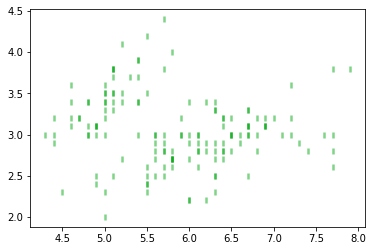

In [23]:

plt.scatter(iris.SepalLengthCm, iris.SepalWidthCm, c= '#00AA11',marker='|',linewidths=2.5,alpha=0.5)

plt.show()


<BarContainer object of 3 artists>

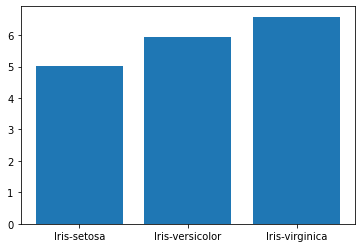

In [30]:
plt.bar(iris_dup_grouped['Species'],iris_dup_grouped['SepalLengthAvg'])

<BarContainer object of 3 artists>

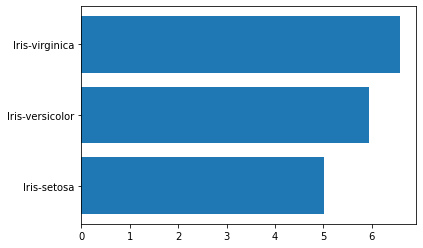

In [51]:
plt.barh(iris_dup_grouped['Species'],iris_dup_grouped['SepalLengthAvg'])

(array([37., 13.,  0.,  3.,  8., 26., 29., 18., 11.,  5.]),
 array([1.  , 1.59, 2.18, 2.77, 3.36, 3.95, 4.54, 5.13, 5.72, 6.31, 6.9 ]),
 <BarContainer object of 10 artists>)

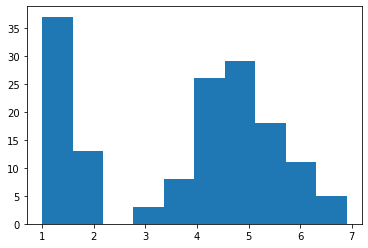

In [35]:
plt.hist(iris['PetalLengthCm'])

(array([ 37.,  50.,  50.,  53.,  61.,  87., 116., 134., 145., 150.]),
 array([1.  , 1.59, 2.18, 2.77, 3.36, 3.95, 4.54, 5.13, 5.72, 6.31, 6.9 ]),
 <BarContainer object of 10 artists>)

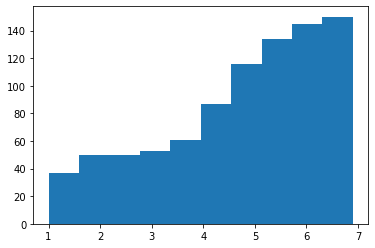

In [36]:
plt.hist(iris['PetalLengthCm'],cumulative=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x2068dff6490>,
 'caps': [<matplotlib.lines.Line2D at 0x2068dff6fd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2068dff6310>,
 'medians': [<matplotlib.lines.Line2D at 0x2068df7fd30>,
 'fliers': [<matplotlib.lines.Line2D at 0x2068df7f3d0>,
 'means': []}

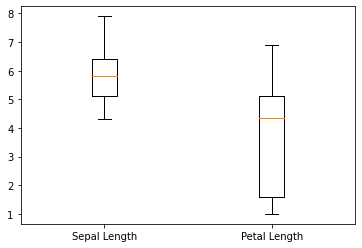

In [50]:
# Box plot

plt.boxplot([iris['SepalLengthCm'],iris['PetalLengthCm']],labels=['Sepal Length','Petal Length'])

([<matplotlib.patches.Wedge at 0x2068d37abb0>,
 [Text(0.5499999702695115, 0.9526279613277875, 'Apple'),
  Text(-0.5499998810780428, -0.9526280128224968, 'Banana')])

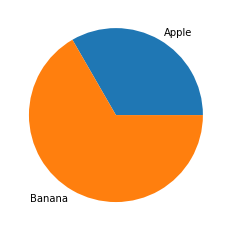

In [41]:
# Pie chart example:ls = ['Apple','Banana']

cnt = [10,20]

plt.pie(cnt, labels=ls)

In [ ]:
plt.c